Perform customer market segmentation to separate customers into different groups and better effectively target each different group

Get dataset from kaggle which contains credit card holders with different behaviours as features. Perform unsupervised learning methods such as K-Means Clustering, Principal Component Analysis and Autoencoders via artificial neural networks to cluster the credit card holders into different groups

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download arjunbhasin2013/ccdata

  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 46.6MB/s]


In [ ]:
! unzip ccdata.zip

Archive:  ccdata.zip
  inflating: CC GENERAL.csv          


In [ ]:
df = pd.read_csv('/content/CC GENERAL.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Check if there's any null values and if there is handle them


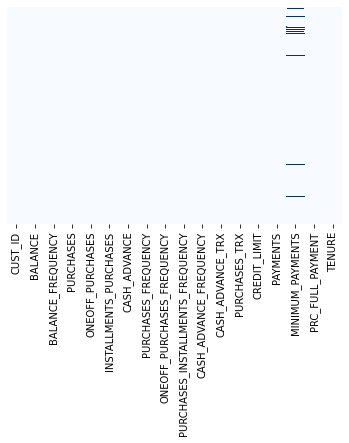

In [ ]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Impute missing data of 'MINIMUM_PAYMENTS' feature with its mean
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [ ]:
#Impute missing data of 'CREDIT_LIMIT' feature with its mean
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

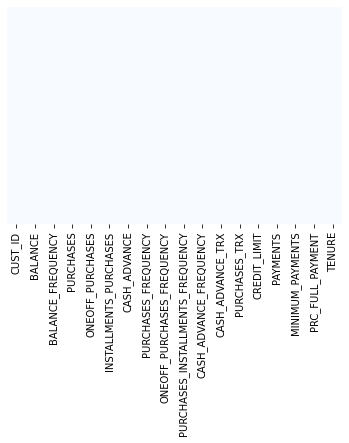

In [ ]:
 sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
df.duplicated().sum()

0

In [ ]:
#drop customer id because it is irrelevant to the model
df.drop("CUST_ID", axis = 1, inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

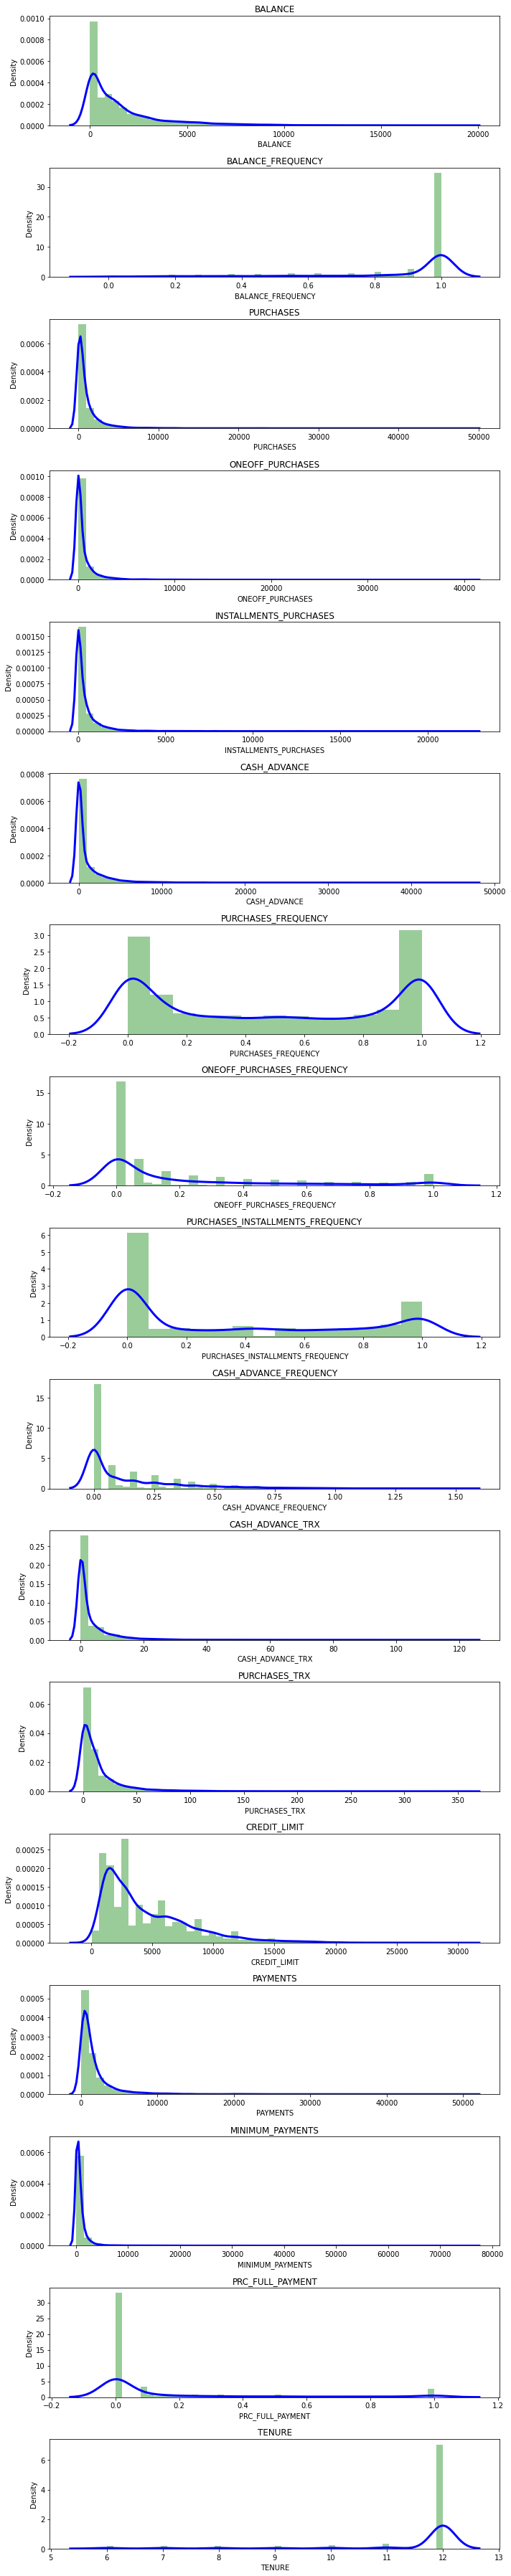

In [ ]:
#data visualization for each of the features
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

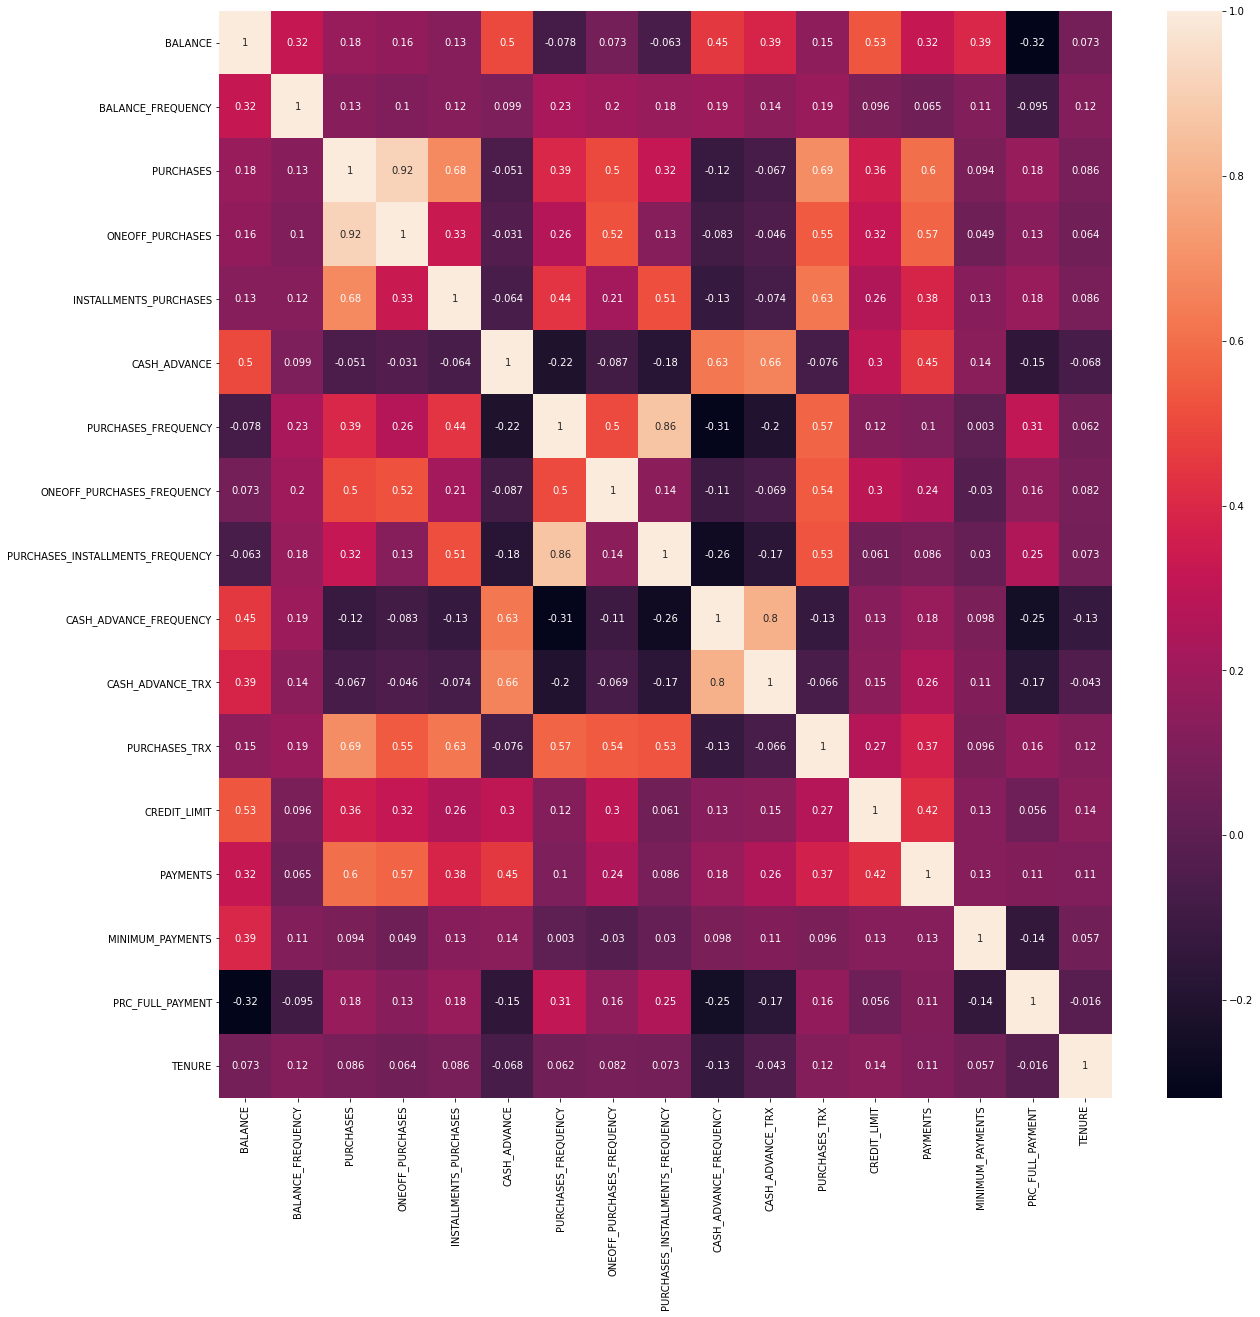

In [ ]:
# get correlations between all the features
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [ ]:
# scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Perform K-Means Clustering to group the data points(the credit card holders) together in an unsupervised manner 

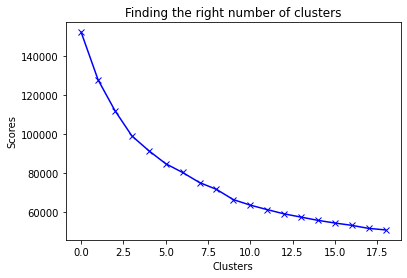

In [ ]:
# using the elbow method to determine the optimal number of clusters

scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# 4th cluster seems to be at the elbow of the curve but values don't reduce linearly until the 8th cluster,
# thus choose number of clusters to be 7

In [ ]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers  

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.687342,0.392882,-0.216930,-0.155094,-0.228062,2.010375,-0.470110,-0.207420,-0.410772,1.914120,1.920095,-0.265286,1.030401,0.820381,0.552817,-0.389946,0.071038
1,0.012799,0.403919,-0.357257,-0.241873,-0.400256,-0.093456,-0.853978,-0.395246,-0.755334,0.104508,-0.027140,-0.482114,-0.303495,-0.249364,-0.011508,-0.455335,0.273216
2,-0.135122,0.400026,0.539965,0.670126,0.045418,-0.331602,0.978235,1.903507,0.169208,-0.413854,-0.330317,0.616791,0.429806,0.143800,-0.158523,0.445565,0.268855
3,-0.701251,-2.141884,-0.310520,-0.235029,-0.302316,-0.322150,-0.555316,-0.442677,-0.440150,-0.521105,-0.376272,-0.419502,-0.175348,-0.202111,-0.256754,0.281920,0.198841
4,-0.361764,0.332611,-0.035105,-0.242422,0.362175,-0.363398,0.992170,-0.383369,1.204189,-0.473749,-0.360364,0.189269,-0.260806,-0.215100,-0.030668,0.312620,0.256362
5,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
6,1.042239,0.465006,2.500780,1.806350,2.594499,-0.161300,1.164798,1.562962,1.273275,-0.284847,-0.150801,3.128411,1.303209,1.436890,0.559682,0.251719,0.337526
7,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5076.534369,0.970341,539.730619,335.012821,204.834392,5194.721667,0.301673,0.140580,0.201186,0.518179,16.352064,8.115826,8243.468515,4108.065221,2152.523773,0.039662,11.612385
1,1591.114825,0.972955,239.919818,190.978172,49.121538,782.889801,0.147608,0.084548,0.064248,0.156057,3.063613,2.726281,3390.209621,1011.258480,837.387051,0.020537,11.882952
2,1283.228811,0.972033,2156.847729,1704.708833,452.138896,283.486514,0.882964,0.770311,0.431685,0.052328,0.994657,30.040962,6058.261151,2149.431652,494.775970,0.284035,11.877115
3,104.879787,0.369878,339.774078,202.337758,137.687420,303.307732,0.267475,0.070399,0.189510,0.030866,0.681049,4.282572,3856.463151,1148.051951,265.852622,0.236172,11.783418
4,811.493875,0.956063,928.202500,190.066807,738.577911,216.807625,0.888556,0.088091,0.843013,0.040342,0.789604,19.414356,3545.529803,1110.450768,792.735959,0.245151,11.860396
5,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
6,3733.806745,0.987426,6346.159662,3590.608789,2757.241014,640.617891,0.957840,0.668720,0.870470,0.078143,2.219718,92.470423,9236.056338,5892.801050,2168.520942,0.227338,11.969014
7,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([1, 0, 3, ..., 5, 5, 5], dtype=int32)

In [ ]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


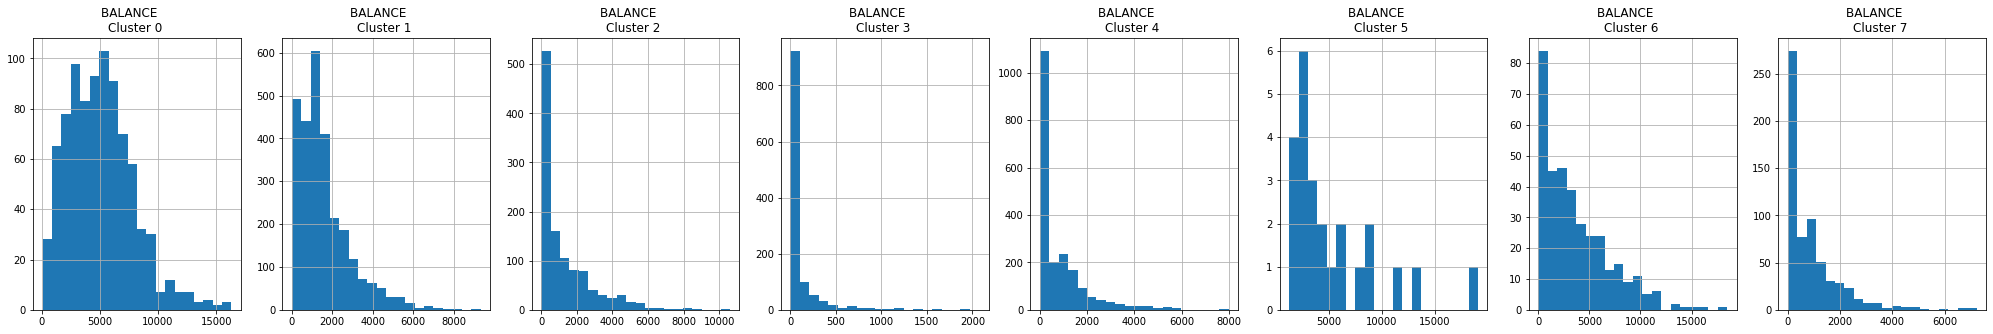

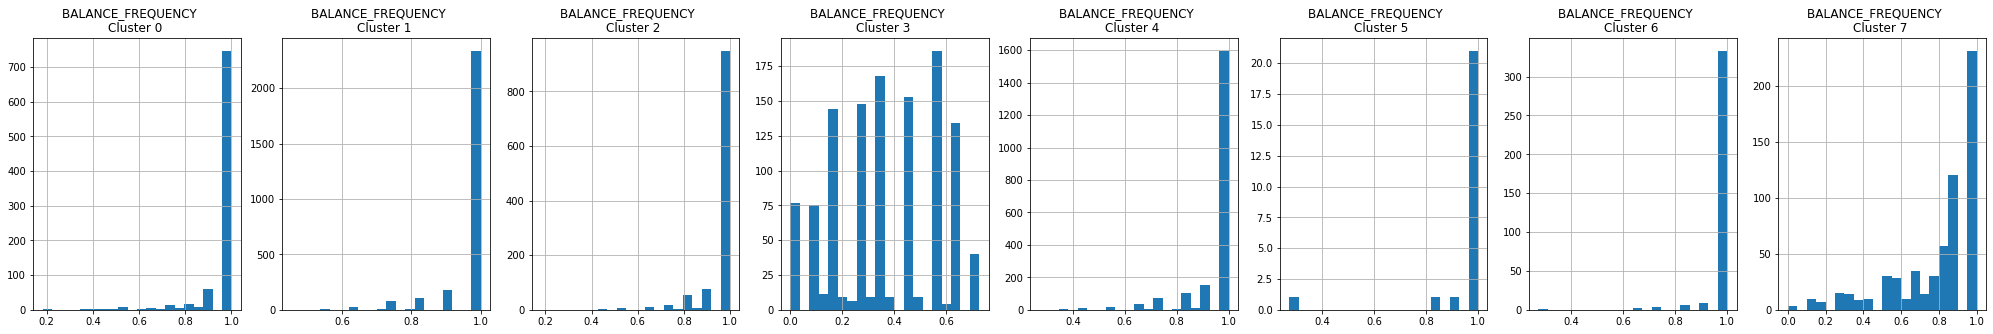

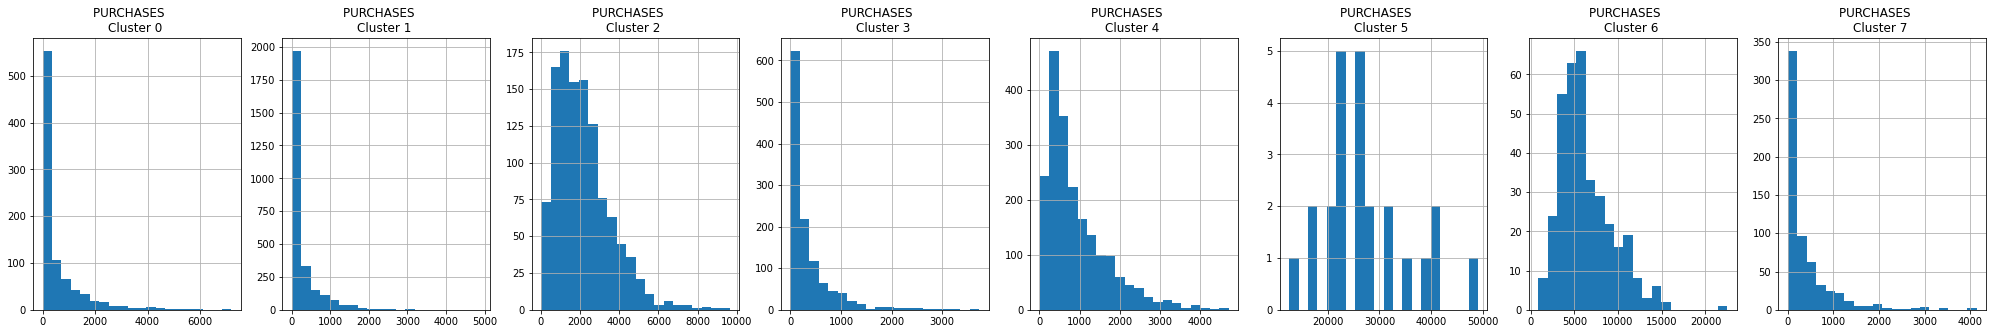

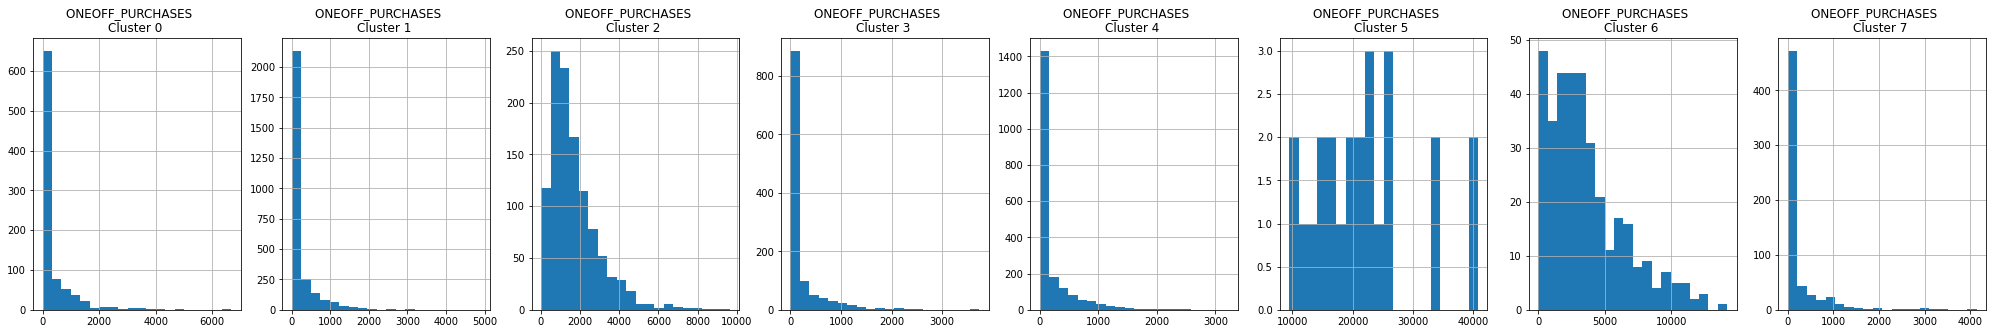

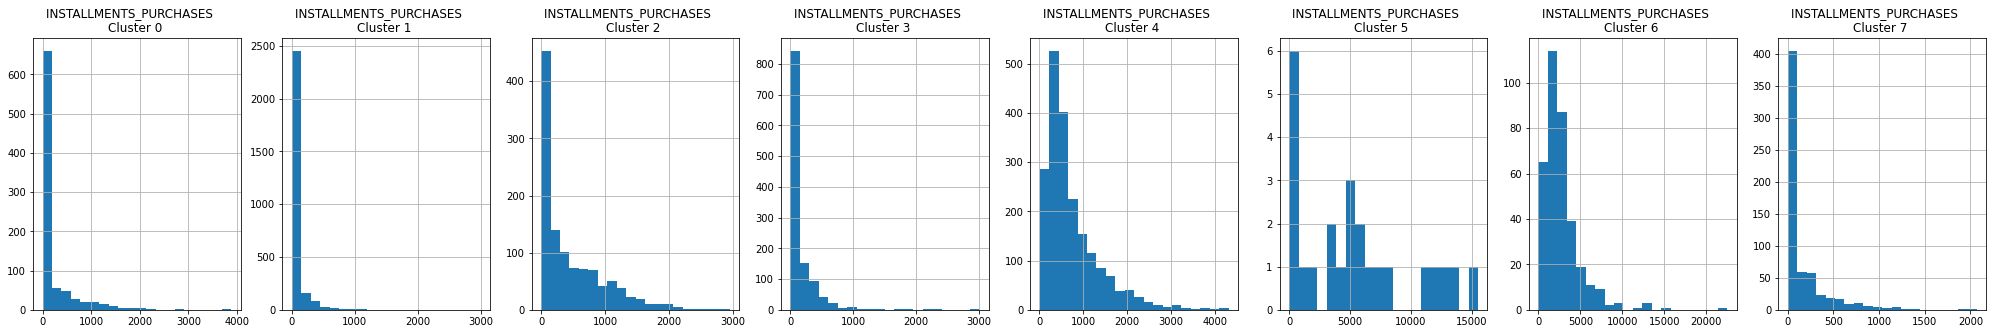

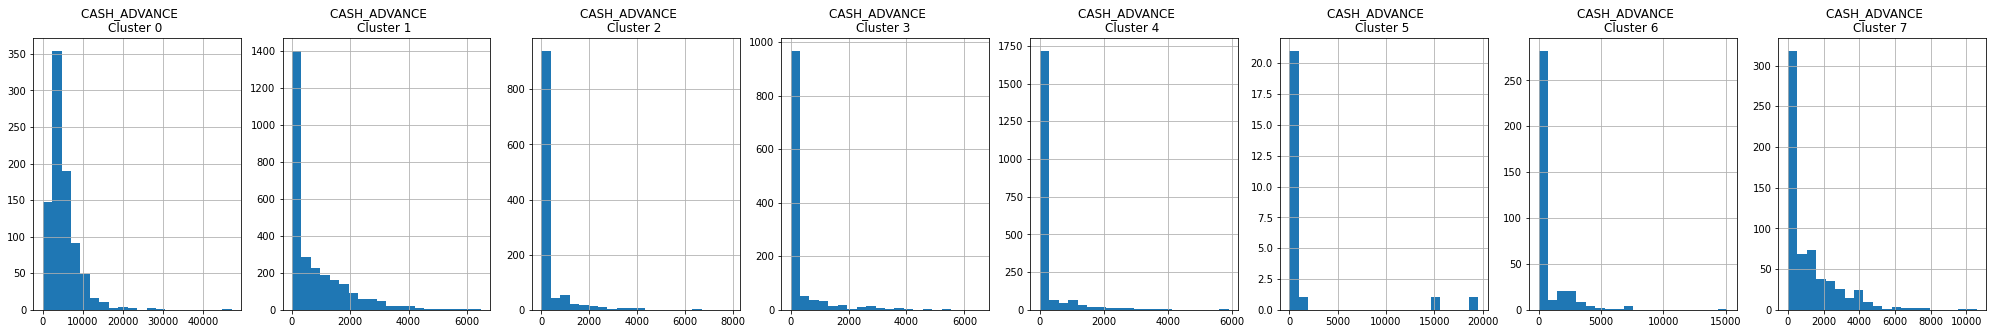

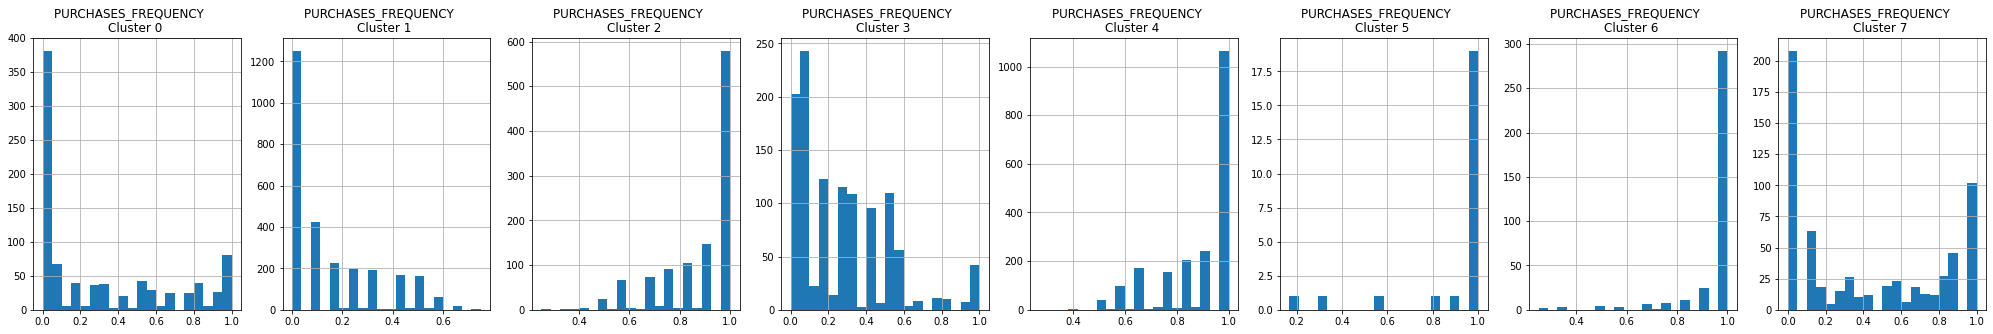

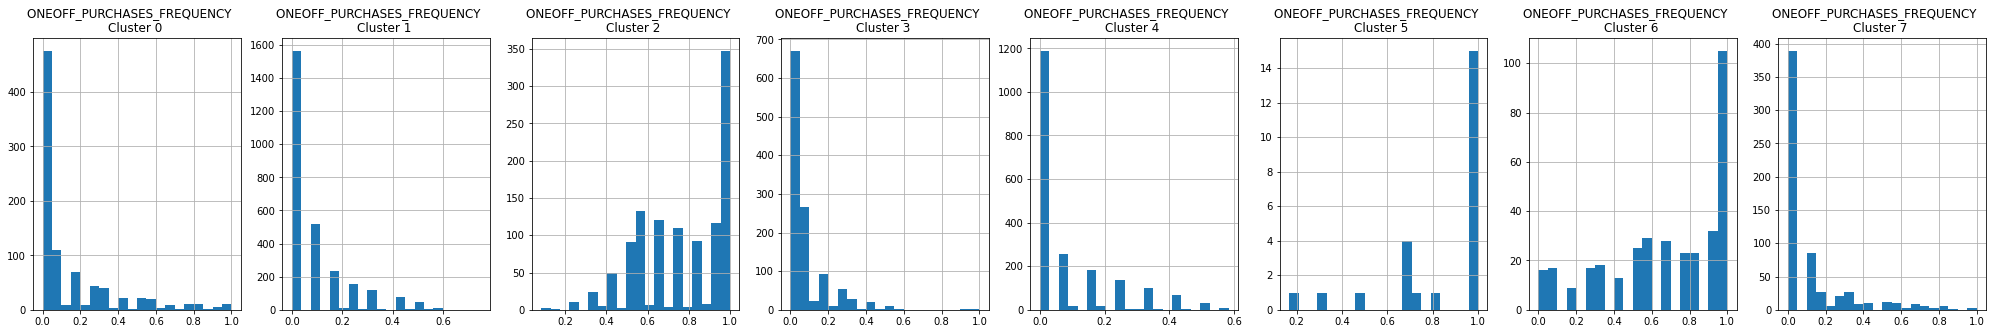

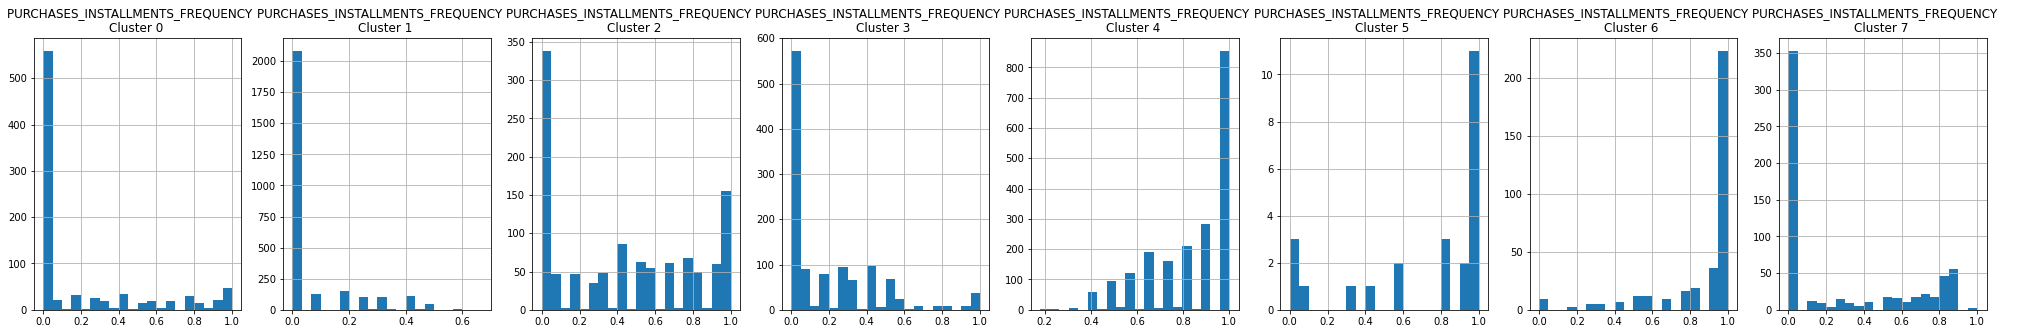

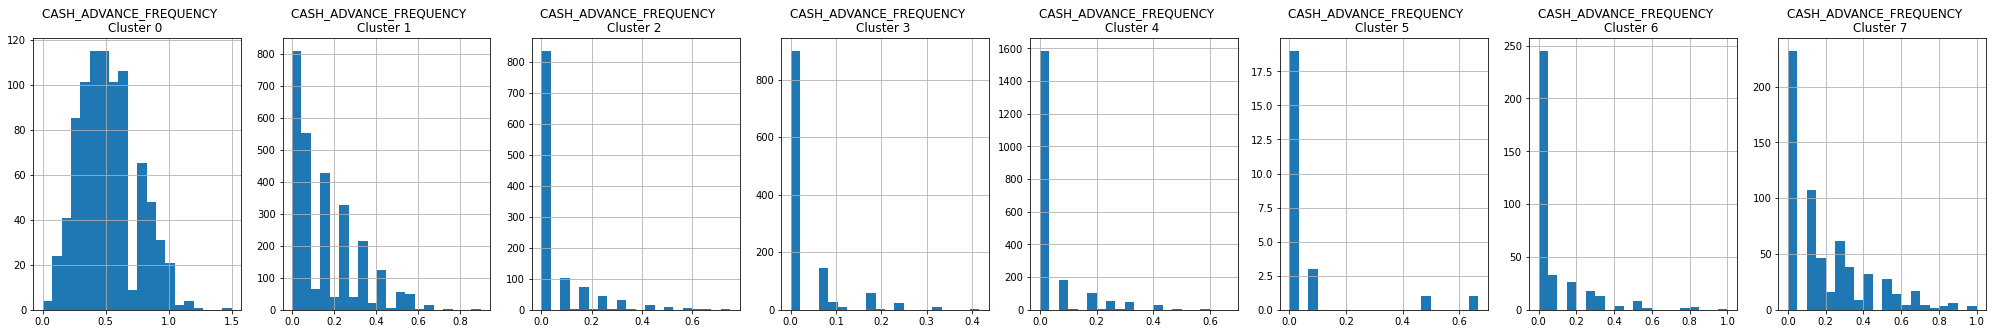

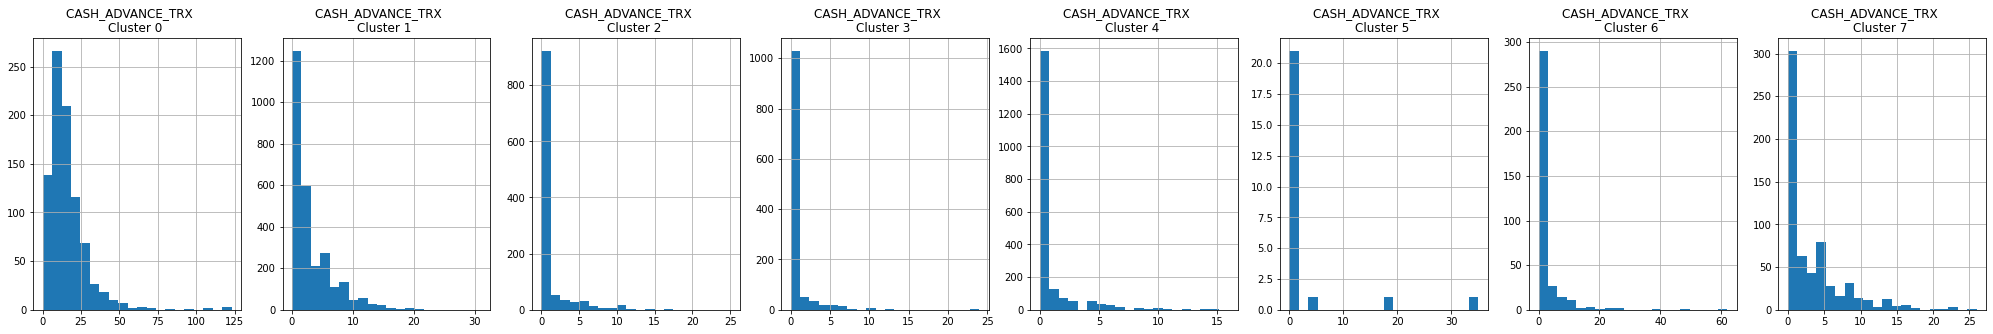

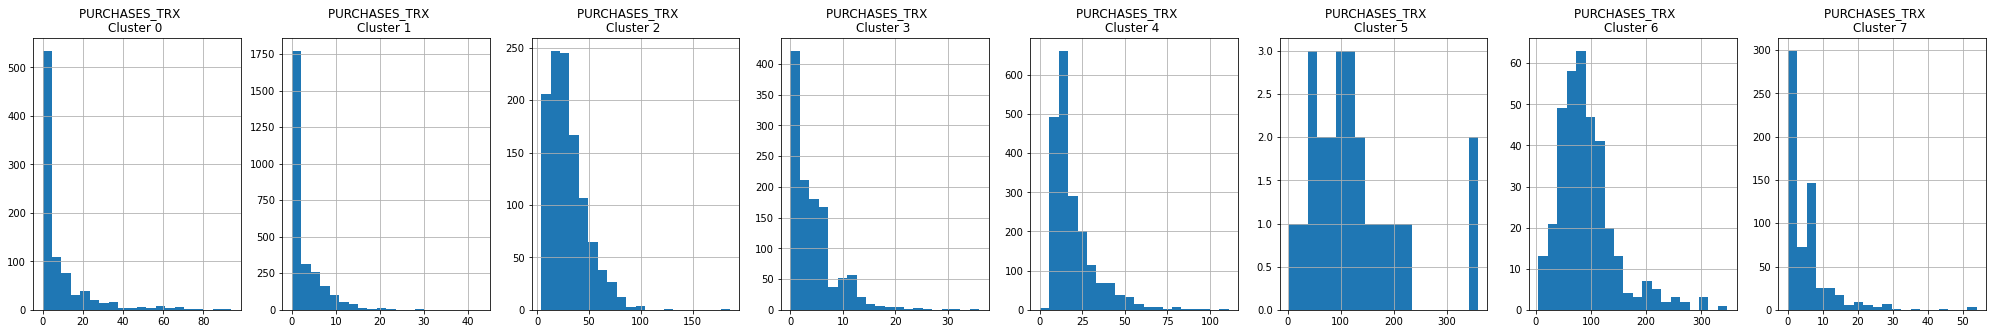

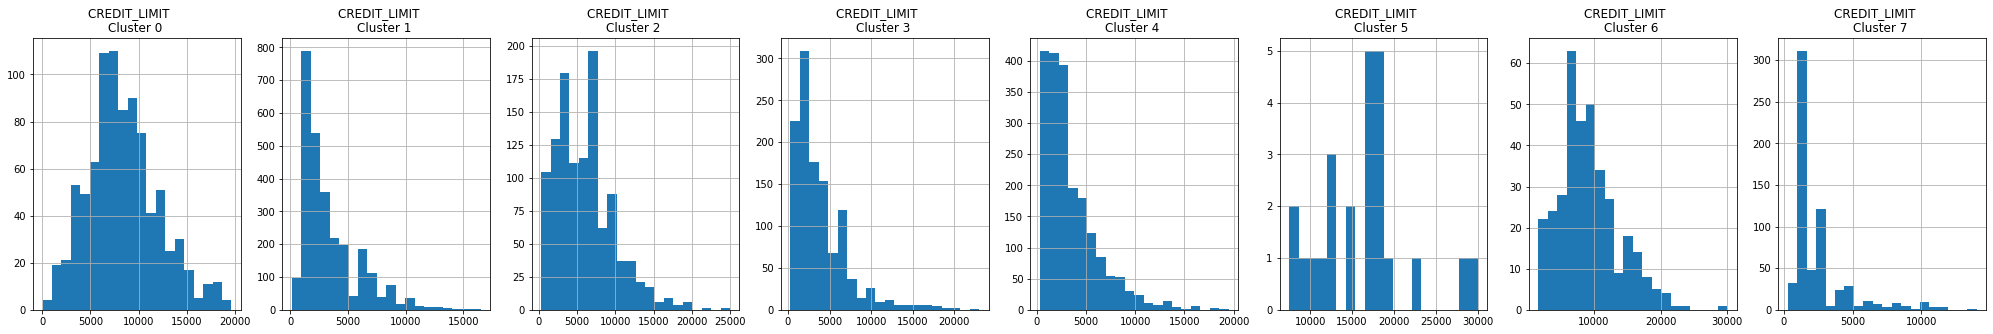

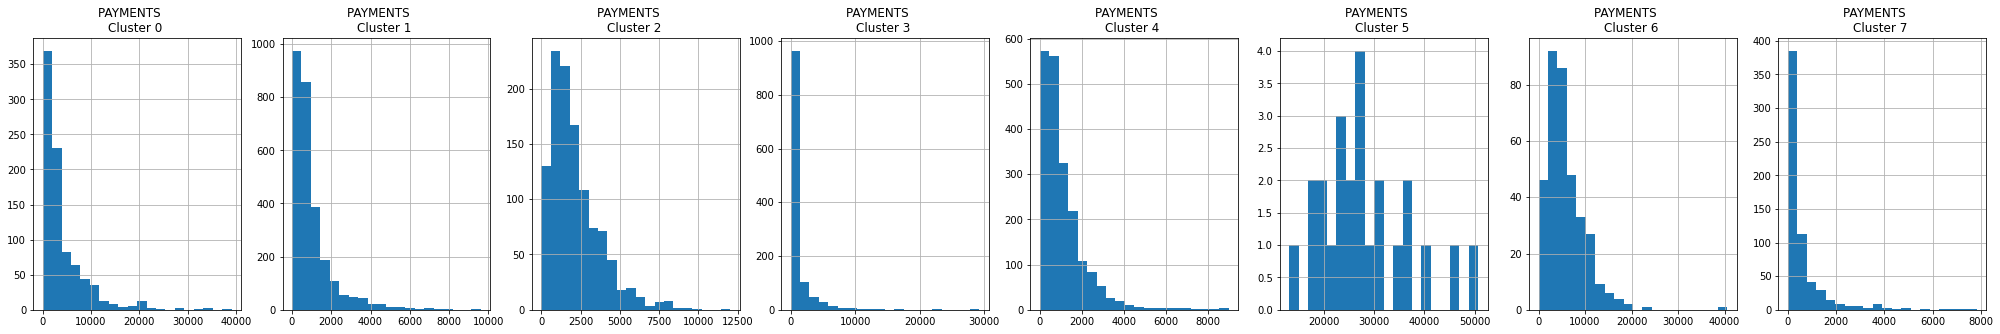

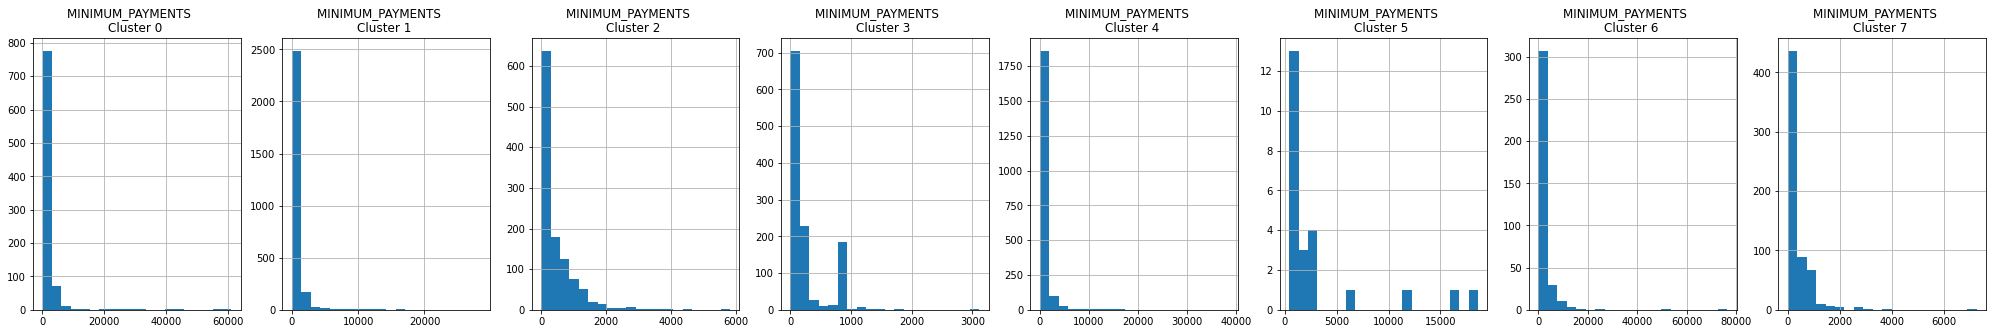

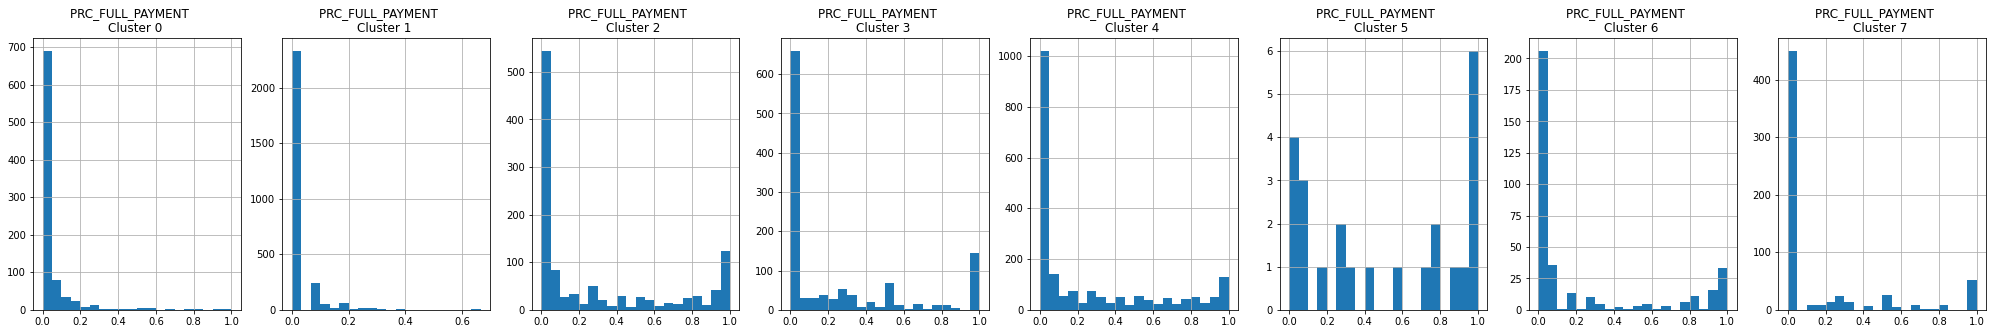

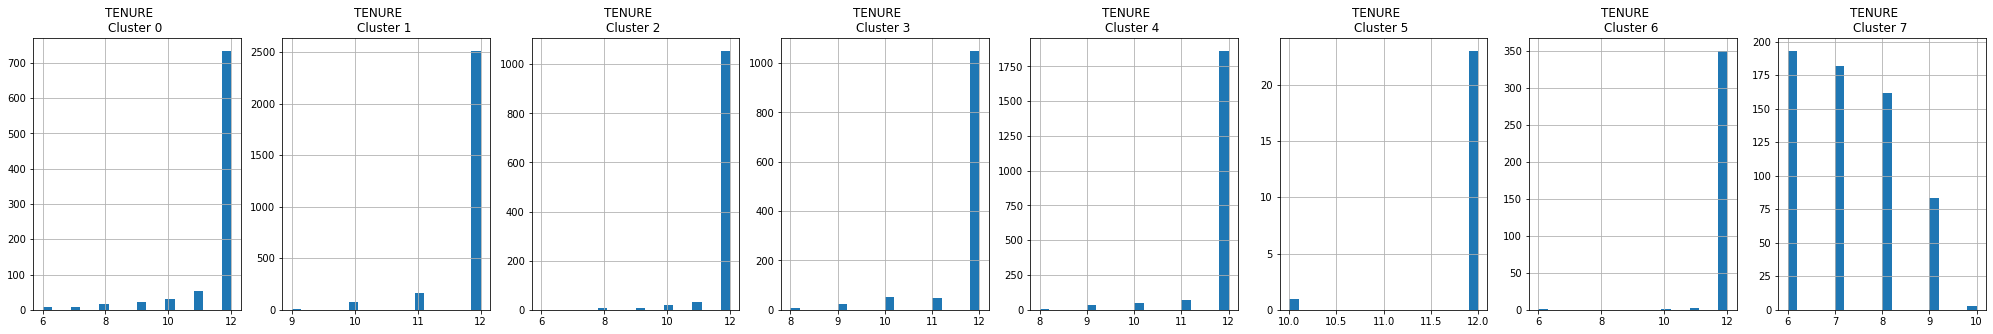

In [ ]:
# plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

Apply Principal component analysis to perform dimensionality reduction to find new components without losing too much information

In [ ]:
# obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222007, -1.07644945],
       [-1.13829493,  2.50647868],
       [ 0.96968159, -0.38352527],
       ...,
       [-0.92620298, -1.81078429],
       [-2.33654964, -0.65796276],
       [-0.55642157, -0.40046824]])

In [ ]:
# create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076449
1,-1.138295,2.506479
2,0.969682,-0.383525
3,-0.873628,0.043167
4,-1.599434,-0.688580


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076449,1
1,-1.138295,2.506479,0
2,0.969682,-0.383525,2
3,-0.873628,0.043167,1
4,-1.599434,-0.688580,1


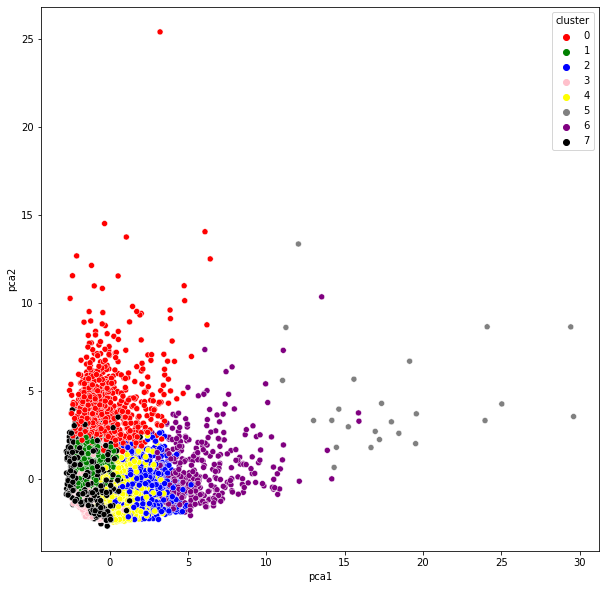

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

Use autoencoders to perform dimensionality reduction to eliminate insignificant features by using artificial neural networks for representation learning

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [ ]:
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 5s 52ms/step - loss: 0.5053
Epoch 2/25
70/70 [==============================] - 4s 53ms/step - loss: 0.2935
Epoch 3/25
70/70 [==============================] - 4s 53ms/step - loss: 0.2375
Epoch 4/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1876
Epoch 5/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1524
Epoch 6/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1385
Epoch 7/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1236
Epoch 8/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1174
Epoch 9/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1078
Epoch 10/25
70/70 [==============================] - 4s 53ms/step - loss: 0.0965
Epoch 11/25
70/70 [==============================] - 4s 52ms/step - loss: 0.0942
Epoch 12/25
70/70 [==============================] - 4s 52ms/step - loss: 0.0851
Epoch 13/25
70/70 [==================

In [ ]:
pred = encoder.predict(df_scaled)

In [ ]:
pred.shape

(8950, 10)

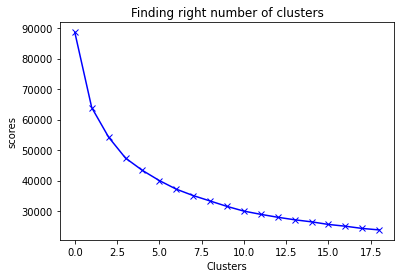

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()


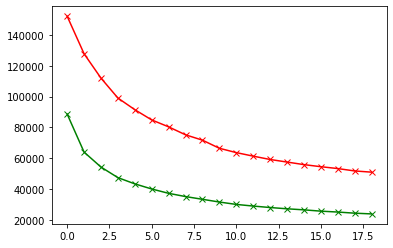

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

# take optimal number of clusters to be 4

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df_scaled)

In [ ]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.197222,-0.027762
1,1.244383,1.723770
2,-0.400498,-0.392456
3,-1.470498,0.082929
4,-2.272123,0.213579


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.197222,-0.027762,0
1,1.244383,1.723770,1
2,-0.400498,-0.392456,0
3,-1.470498,0.082929,0
4,-2.272123,0.213579,0


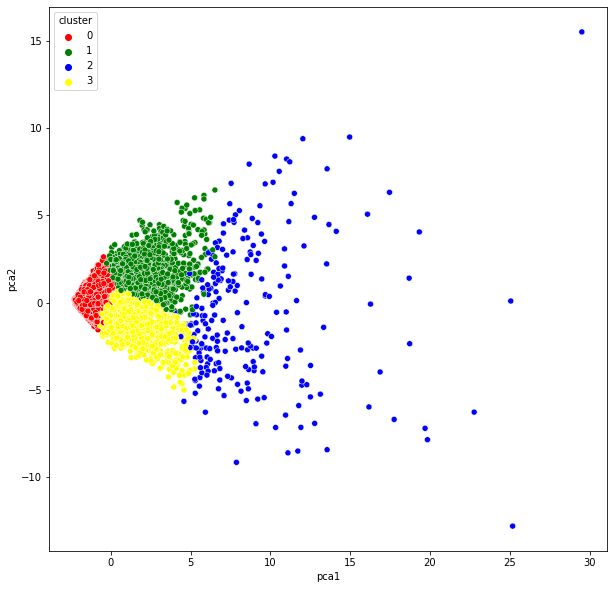

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()